# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity

Import the necessary libraries and create your dataframe(s).

In [1]:
# Importing pandas, numpy, and seaborn.

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the parks CSV.

parks = pd.read_csv("parks.csv")

In [3]:
# Reading the species CSV. When I use the code __species = pd.read_csv("species.csv")__ I receive the error:
#  "DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False."

species = pd.read_csv("species.csv", dtype={"Species ID":str, "Park Name":str, "Category":str, "Order":str, "Family":str, "Scientific Name":str, "Common Names":str, "Record Status":str, "Occurrence":str, "Nativeness": str, "Abundance":str, "Seasonality":str, "Conservation Status":str,"Unnamed: 13":str})

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [4]:
# Looking for duplicate values in the parks dataset.

parks_dupes = parks.duplicated()

parks_dupes.sum()

0

In [5]:
# Looking for duplicate values in the species dataset.

species_dupes = species.duplicated()

species_dupes.sum()

0

In [6]:
# Dropping the unnecessary column identified in EDA.

species = species.drop(['Unnamed: 13'], axis=1)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [7]:
# Using .isnull() to determine the number of null values across columns in the parks dataset.

parks.isnull().sum()

Park Code    0
Park Name    0
State        0
Acres        0
Latitude     0
Longitude    0
dtype: int64

In [8]:
# Using .isnull() to determine the number of null values across columns in the species dataset.

species.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
dtype: int64

In [9]:
# Checking the percentage of null values across columns. 

percent_missing_species = species.isnull().sum() * 100 / len(species)

percent_missing_species

Species ID              0.000000
Park Name               0.000000
Category                0.000000
Order                   1.234402
Family                  1.267946
Scientific Name         0.000000
Common Names            0.000000
Record Status           0.000000
Occurrence             16.890849
Nativeness             21.002449
Abundance              36.010667
Seasonality            83.096572
Conservation Status    96.043540
dtype: float64

In [10]:
# Checking the percentages of values in the Occurrence column to see if there is a clear mode and if I can impute. 

(species['Occurrence'].value_counts())/(species['Occurrence'].value_counts().sum()) * 100

# While the majority of values are 'Present', I'm cautious about imputing missing values with the mode 
# given my business question. 

Present                            84.029221
Not Confirmed                      12.065869
Not Present (False Report)          2.090691
Not Present (Historical Report)     1.321817
Not Present                         0.434888
Approved                            0.051460
In Review                           0.006054
Name: Occurrence, dtype: float64

In [11]:
# Checking the percentages of values in the Nativeness column to see if there is a clear mode and if I can impute. 

(species['Nativeness'].value_counts())/(species['Nativeness'].value_counts().sum()) * 100

# While the majority of values are 'Native', I'm cautious about imputing missing values with the mode 
# given my business question. 

Native           80.623759
Not Native       11.777757
Unknown           7.537976
Present           0.056261
Not Confirmed     0.004246
Name: Nativeness, dtype: float64

In [12]:
# Checking the percentages of values in the Abundance column to see if there is a clear mode and if I can impute. 

(species['Abundance'].value_counts())/(species['Abundance'].value_counts().sum()) * 100

# No clear mode. Will not be imputing, especially given the amount of missing data.

Unknown       36.850313
Uncommon      24.610122
Common        16.922654
Rare          14.111603
Occasional     4.340419
Abundant       3.099363
Native         0.052421
Not Native     0.013105
Name: Abundance, dtype: float64

In [13]:
# Checking the percentages of values in the Seasonality column to see if there is a clear mode and if I can impute. 

(species['Seasonality'].value_counts())/(species['Seasonality'].value_counts().sum()) * 100

# While the majority of values are 'Breeder', I'm cautious about imputing missing values with the mode 
# given my business question. Also choosing not to impute given the amount of missing data.

Breeder                                 60.594334
Resident                                15.949794
Migratory                               14.014982
Vagrant                                  8.235352
Breeder, Winter                          0.317508
Rare                                     0.173637
Summer                                   0.128987
Migratory, Winter                        0.119065
Winter                                   0.099221
Breeder, Resident                        0.099221
Breeder, Migratory                       0.064494
Resident, Winter                         0.044650
Uncommon                                 0.024805
Common                                   0.019844
Migratory, Vagrant                       0.019844
Summer, Vagrant                          0.014883
Breeder, Resident, Summer                0.014883
Migratory, Summer                        0.014883
Unknown                                  0.014883
Resident, Summer                         0.009922


In [14]:
# Checking the percentages of values in the Conservation Status column to see if there is a clear mode and if I 
# can impute. 

(species['Conservation Status'].value_counts())/(species['Conservation Status'].value_counts().sum()) * 100

# While the majority of values are 'Species of Concern', I'm cautious about imputing missing values with the mode 
# given my business question. Wondering if those who collected the data left this column blank for species that are 
# relatively common (i.e., Why record Conservation Status if there is nothing notable?)
# Also choosing not to impute given the amount of missing data.

Species of Concern     81.454006
Endangered              7.927088
Under Review            4.111912
Threatened              3.899958
In Recovery             1.632047
Proposed Endangered     0.508690
Proposed Threatened     0.148368
Breeder                 0.148368
Resident                0.105977
Migratory               0.042391
Extinct                 0.021195
Name: Conservation Status, dtype: float64

In [15]:
# Given the above results, I'm choosing to handle remaining missing data by filling with "_MISSING_". 
# If I choose to use these columns in later analysis I'll note that results should be interpreted with varying 
# levels of caution based on the amount of _MISSING_ values. 

species['Order'] = species['Order'].fillna('_MISSING_')
species['Family'] = species['Family'].fillna('_MISSING_')
species['Occurrence'] = species['Occurrence'].fillna('_MISSING_')
species['Nativeness'] = species['Nativeness'].fillna('_MISSING_')
species['Abundance'] = species['Abundance'].fillna('_MISSING_')
species['Seasonality'] = species['Seasonality'].fillna('_MISSING_')
species['Conservation Status'] = species['Conservation Status'].fillna('_MISSING_')

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

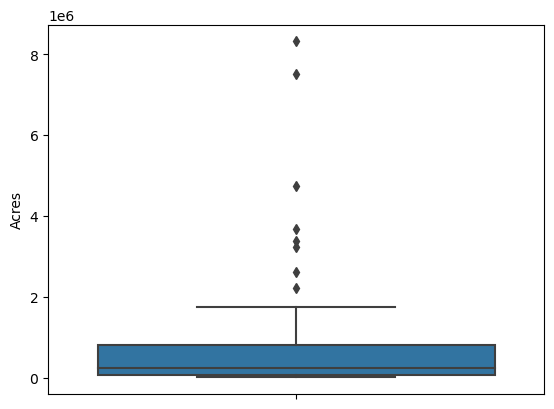

In [16]:
# Determining Acre outliers in the Parks dataset. 

sns.boxplot(y=parks["Acres"]);
plt.show()

# Even though there are several parks that are significantly larger than the majority, I will not be 
# removing these parks from my dataset as that would be counterintuitive given the business question!

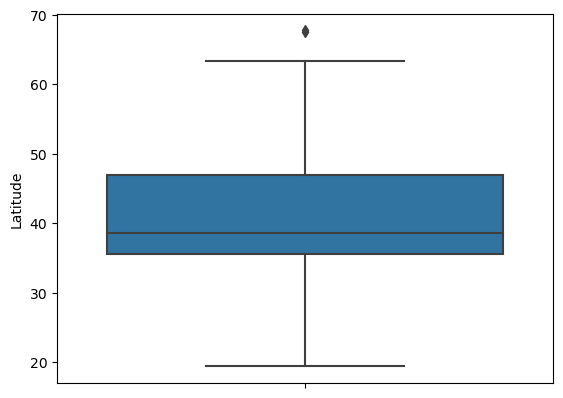

In [17]:
# Determining Latitude outliers in the Parks dataset. 

sns.boxplot(y=parks["Latitude"]);
plt.show()

# Even though there are a handful of parks that are significantly farther North than the majority, I will not be 
# removing these parks from my dataset as that would be counterintuitive given the business question!

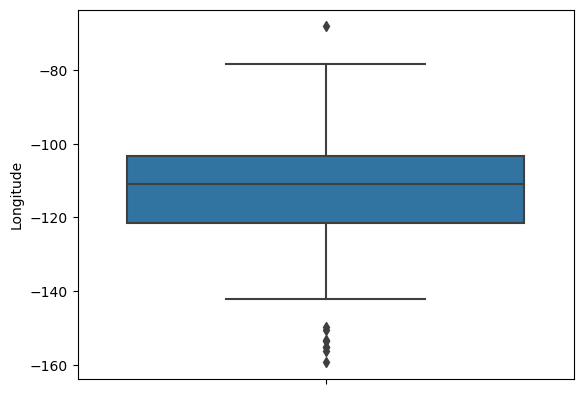

In [18]:
# Determining Longitude outliers in the Parks dataset. 

sns.boxplot(y=parks["Longitude"]);
plt.show()

# Even though there are a handful of parks that are significantly farther East and West than the majority, I will 
# not be removing these parks from my dataset as that would be counterintuitive given the business question!

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [19]:
# Determining the number of unique values for the variables with string data in the parks dataset. 

parks.nunique()

Park Code    56
Park Name    56
State        27
Acres        55
Latitude     53
Longitude    55
dtype: int64

In [20]:
# Converting all the parks strings in a column to lowercase to ensure consistency.

parks = parks.applymap(lambda s: s.lower() if type(s) == str else s)

In [21]:
# Checking the results to see if there were upper/lowercase inconsistencies.

parks.nunique()

# Looks like there weren't any hidden duplicates that contained inconsistently formatted data. 

Park Code    56
Park Name    56
State        27
Acres        55
Latitude     53
Longitude    55
dtype: int64

In [22]:
# In my EDA I discovered some of the rows in the species dataset were misaligned. Checking the values in the 
# Record Status column to determine what the misaligned values are.

species['Record Status'].value_counts()

Approved                86254
In Review               32937
None                        6
 Willowherb                 1
 Devil's Shoelaces          1
 Verdolagas                 1
 Chico                      1
 Skyrocket Gilia            1
 Grass-Leaf Loco            1
 Golden Pea                 1
 Storksbill                 1
 Cranesbill                 1
 Speedwell                  1
 Common Mullein             1
 Downy Chess                1
 Wiregrass                  1
 Leather Flower             1
 Shadbush                   1
 Wild Rose                  1
 Skunkbush                  1
 Clover Bush                1
 Kinnikinnick               1
 Filaree                    1
 Liver Leaf*                1
 *                          1
 Whortleberry               1
 Claret Cup                 1
 Goosefoot                  1
 Cenizo                     1
 Bluebell                   1
 Purple Cockle              1
 Dames Rocket               1
 Manati                     1
 Ranchers'

In [23]:
# Locating the rows that contain the misaligned data.

species.loc[species['Record Status'].isin([" Willowherb", " Devil's Shoelaces", " Verdolagas", " Chico", " Skyrocket Gilia", " Grass-Leaf Loco", " Golden Pea", " Storksbill", " Cranesbill", " Speedwell", " Common Mullein", " Downy Chess", " Wiregrass", " Leather Flower", " Shadbush", " Wild Rose", " Skunkbush", "Clover Bush", " Kinnikinnick", " Filaree", " Liver Leaf*", " *", " Whortleberry", " Claret Cup", " Goosefoot", " Cenizo", " Bluebell", " Purple Cockle", " Dames Rocket", " Manati", " Ranchers' Fireweed", " Cocodrilo De Tumbes", " Cabezon", " Wapiti", " Short-Tailed Weasel", " White-Footed Mouse", " Northern Goshawk", " Northern Pintail", " Common Poorwill", " Pigeon Hawk", " Bushtit", " American Crow", " Catbird", " Robin", " Speckled Trout", " Osha", " Wild Iris", " Fringed Sage", " Rushpink", " Ground Daisy", "P.Nut Sedge"])]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
812,ACAD-1812,Acadia National Park,Vascular Plant,Caryophyllales,Caryophyllaceae,Agrostemma githago,Corn Cockle,Purple Cockle,Approved,Not Confirmed,Not Native,_MISSING_,_MISSING_
3280,BADL-1523,Badlands National Park,Vascular Plant,Brassicales,Brassicaceae,Hesperis matronalis,Dame's Rocket,Dames Rocket,Approved,Present,Not Native,Rare,_MISSING_
6441,BISC-1026,Biscayne National Park,Mammal,Sirenia,Trichechidae,Trichechus manatus,Manatee,Manati,Approved,Present,Unknown,Unknown,_MISSING_
27484,DEVA-2399,Death Valley National Park,Vascular Plant,Boraginales,Boraginaceae,Amsinckia menziesii,Fiddleneck,Ranchers' Fireweed,Approved,Present,Native,Unknown,_MISSING_
31786,EVER-1414,Everglades National Park,Reptile,Crocodilia,Crocodylidae,Crocodylus acutus,American Crocodile,Cocodrilo De Tumbes,Approved,Present,Native,Uncommon,Resident
31826,EVER-1454,Everglades National Park,Reptile,Testudines,Cheloniidae,Caretta caretta,Loggerhead,Cabezon,Approved,Present,Native,Rare,Breeder
44600,GRSA-1003,Great Sand Dunes National Park and Preserve,Mammal,Artiodactyla,Cervidae,Cervus elaphus,American Elk,Wapiti,Approved,Present,Native,Rare,Migratory
44610,GRSA-1013,Great Sand Dunes National Park and Preserve,Mammal,Carnivora,Mustelidae,Mustela erminea,Ermine,Short-Tailed Weasel,Approved,Present,Native,Rare,Migratory
44640,GRSA-1043,Great Sand Dunes National Park and Preserve,Mammal,Rodentia,Cricetidae,Peromyscus maniculatus,Deer Mouse,White-Footed Mouse,Approved,Present,Native,Rare,Breeder
44666,GRSA-1069,Great Sand Dunes National Park and Preserve,Bird,Accipitriformes,Accipitridae,Accipiter gentilis,Goshawk,Northern Goshawk,Approved,Present,Native,Rare,Breeder


In [24]:
# Dropping the rows with misaligned data. I could write code to move the values down a column so that they were 
# correctly aligned but without knowing the specific contraints of the dataset (i.e., which specific values are 
# associated with each column) I'm hesitant to correct the rows manually. 

species.drop([812, 3280, 6441, 27484, 31786, 31826, 44600, 44610, 44640, 44666, 44678, 44705, 44733, 44744, 44759, 44818, 44859, 44924, 44933, 44944, 44968, 45018, 45060, 45064, 45114, 45115, 45127, 45158, 45169, 45170, 45194, 45210, 45220, 45240, 45241, 45272, 45279, 45312, 45367, 45402, 45473, 45492, 45521, 45529, 45535, 53164, 53307, 79001, 79013, 79016, 98533
], axis=0, inplace=True)

In [25]:
# Checking to see if the misaligned rows were successfuly dropped.

species['Record Status'].value_counts()

Approved     86254
In Review    32937
None             6
Name: Record Status, dtype: int64

In [26]:
# Determining the number of unique values for the variables with string data in the species dataset. 

species.nunique()

Species ID             119197
Park Name                  56
Category                   14
Order                     555
Family                   2333
Scientific Name         46021
Common Names            35812
Record Status               3
Occurrence                  7
Nativeness                  5
Abundance                   7
Seasonality                21
Conservation Status         9
dtype: int64

In [27]:
# Converting all the species strings in a column to lowercase to ensure consistency.

species = species.applymap(lambda s: s.lower() if type(s) == str else s)

In [28]:
# Checking the results to see if there were upper/lowercase inconsistencies.

species.nunique()

# Looks like there weren't any hidden duplicates that contained inconsistently formatted data. 

Species ID             119197
Park Name                  56
Category                   14
Order                     555
Family                   2333
Scientific Name         46019
Common Names            35812
Record Status               3
Occurrence                  7
Nativeness                  5
Abundance                   7
Seasonality                21
Conservation Status         9
dtype: int64

In [29]:
# Finally, I'm going to change the column names in the parks dataset to remove spaces. 

parks = parks.rename(columns={'Park Code': 'Park_Code', 'Park Name': 'Park_Name'})

In [30]:
# Finally, I'm going to change the column names in the parks dataset to remove spaces. 

species = species.rename(columns={'Species ID': 'Species_ID', 'Park Name': 'Park_Name', 'Scientific Name': 'Scientific_Name', 'Common Names': 'Common_Names', 'Record Status': 'Record_Status', 'Conservation Status': 'Conservation_Status'})

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

The Species dataset had quite a bit of missing data, no irregular data, and some inconsistent data due to the data being misaligned with the columns for several species. Because some of the data were misaligned, the dataset also inluded an unnecessary column, which I dropped. 

The Parks dataset did not have dirty data. 

2. Did the process of cleaning your data give you new insights into your dataset?

Not really! I didn't learn too much more than what I learned from EDA. 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

I replaced a lot of missing values in several columns with "_MISSING_". If I choose to visualize data using these columns I'll have to use caution when interpreting / presenting the results. 